# Principal Component Analysis (PCA) 
Principal Component Analysis (PCA) <span style="color:firebrick">[1]</span> is a statistical technique used to simplify complex data by reducing its dimensionality, while still preserving as much variance (information) as possible. PCA works by transforming the original variables into new, uncorrelated variables called principal components, which are ordered by the amount of variance they capture from the data. 

We use the Wine Quality dataset as an example. It contains physicochemical properties and quality ratings of wine samples. This dataset is widely used for classification and regression tasks to predict the quality of wine based on its chemical composition. The wine samples are categorized by quality scores, typically from a scale of 0 to 10. 

| **Variable**              | **Description**                                                                  |
|---------------------------|----------------------------------------------------------------------------------|
| **Fixed Acidity**         | Concentration of non-volatile acids, like tartaric acid, affecting taste         |
| **Volatile Acidity**      | Amount of acetic acid, giving a vinegar taste if too high                        |
| **Citric Acid**           | Citric acid content, adding freshness and enhancing taste                        |
| **Residual Sugar**        | Sugar left after fermentation, influencing sweetness                             |
| **Chlorides**             | Level of salt, impacting taste                                                   |
| **Free Sulfur Dioxide**   | Unbound SO₂, acting as an antioxidant and preservative                           |
| **Total Sulfur Dioxide**  | Combined free and bound SO₂, helping preserve the wine                           |
| **Density**               | Density of wine, influenced by sugar and alcohol content                         |
| **pH**                    | Acidity level, contributing to the wine’s balance                                |
| **Sulphates**             | Adds to wine taste and serves as a preservative                                  |
| **Alcohol**               | Alcohol percentage by volume                                                     |
| **Quality** (target)      | Wine quality score, typically ranging from 3 to 8, based on human evaluation     |

In [ ]:
from ucimlrepo import fetch_ucirepo
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler


In [2]:
wine = fetch_ucirepo(id=109) 
X = wine.data.features 
y = wine.data.targets 
X.head()


,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


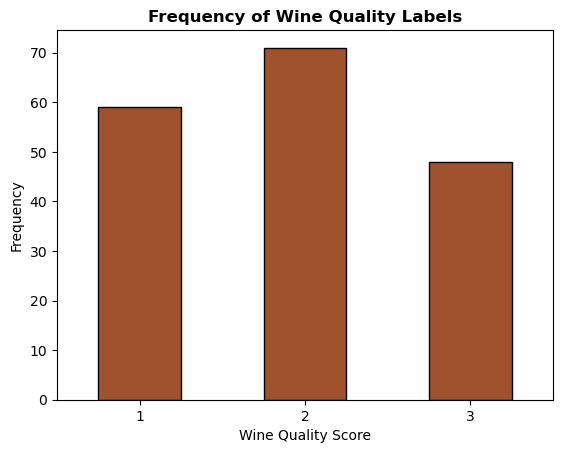

In [3]:
y.value_counts().sort_index().plot(kind='bar', edgecolor='black', color='sienna')
plt.title("Frequency of Wine Quality Labels", fontweight='bold')
plt.xlabel("Wine Quality Score")
plt.ylabel("Frequency")
plt.xticks(ticks=[0, 1, 2], labels=[1, 2, 3])
plt.xticks(rotation=0)
plt.show()


## Principal Component
Given a dataset $\mathbf{X} \in \mathbb{R}^{n \times p}$, where $n$ is the number of samples and $p$ is the number of features, we first standardize the data by subtracting the mean of each feature and dividing by the standard deviation (or variance if only centering is required for PCA. The covariance matrix $\mathbf{\Sigma}$ of the centered data $\mathbf{X}_{\text{c}}$ is calculated as:
$$\mathbf{\Sigma} = \frac{1}{n} \mathbf{X}_{\text{c}}^\top \mathbf{X}_{\text{c}}$$
This covariance matrix $\mathbf{\Sigma} \in \mathbb{R}^{p \times p}$ captures the variance structure of the features. To find the principal components, we solve the eigenvalue problem for the covariance matrix $\mathbf{\Sigma}$:
$$\mathbf{\Sigma} \boldsymbol{w}_i = \lambda_i \boldsymbol{w}_i$$
where $\lambda_i$ is the $i$-th eigenvalue and $\boldsymbol{w}_i$ is the corresponding eigenvector of $\mathbf{\Sigma}$.

The eigenvalues $\lambda_1 \geq \lambda_2 \geq \dots \geq \lambda_p \geq 0$ represent the amount of variance captured by each principal component. The eigenvectors $\boldsymbol{w}_i$ (often normalized to unit length) are the directions in feature space along which the variance is maximized.

To reduce dimensionality, we select the top $k$ eigenvectors corresponding to the $k$ largest eigenvalues. These eigenvectors form the matrix $\mathbf{W}_k \in \mathbb{R}^{p \times k}$, where $k \leq p$. The principal component scores (the new representation of the data in the reduced $k$-dimensional space) are given by projecting $\mathbf{X}_{\text{c}}$ onto $\mathbf{W}_k$:
$$\mathbf{Z}_k = \mathbf{X}_{\text{c}} \mathbf{W}_k$$
where $\mathbf{Z}_k \in \mathbb{R}^{n \times k}$ represents the dataset in the reduced $k$-dimensional space. In this reduced $k$-dimensional space, the matrix $\mathbf{Z}_k$ contains the transformed data where each row is a sample represented by its principal component scores. This new representation in $\mathbf{Z}_k$ retains most of the variability in the original data, as it captures the primary directions (principal components) of maximum variance.

In [4]:
std = StandardScaler()
X_std = std.fit_transform(X)
cov_matrix = np.cov(X_std, rowvar=False) 
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]
print("Eigenvalues:", eigenvalues)


Eigenvalues: [4.73243698 2.51108093 1.45424187 0.92416587 0.85804868 0.64528221
 0.55414147 0.35046627 0.29051203 0.25232001 0.22706428 0.16972374
 0.10396199]


The eigenvalues indicate the amount of variance each principal component captures from the original data. Higher values signify components that preserve more information, while lower values indicate less important components.

## Scree Plot
A **scree plot** is a line plot of the eigenvalues of each principal component, which visually represents how much variance each component explains <span style="color:firebrick">[2]</span>. It helps in determining the optimal number of principal components to retain by identifying the "elbow" point, where the amount of variance captured starts to decrease more gradually. Typically, components before this elbow contribute significantly to explaining the data, while those after contribute less and can often be discarded to simplify the dataset.

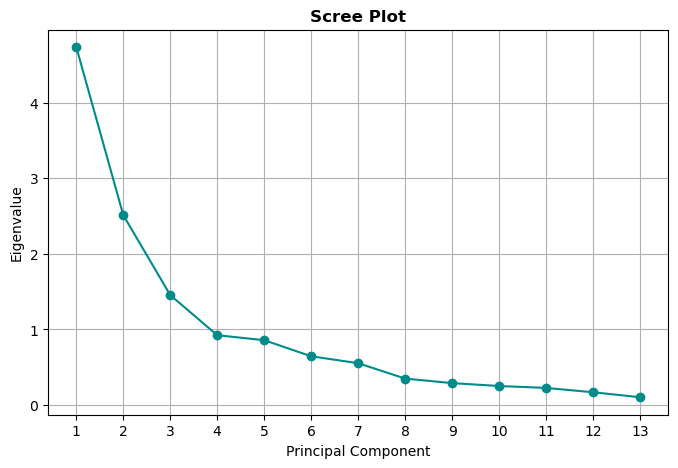

In [5]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o', linestyle='-', color='darkcyan')
plt.title('Scree Plot', fontweight='bold')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.xticks(range(1, len(eigenvalues) + 1))
plt.grid(True)
plt.show()


From this scree plot, retaining the first three principal components would likely capture most of the important variance in the data, making it a reasonable choice for dimensionality reduction. 

## Projection
Based the result from scree plot, we select the top $3$ components ($k = 3$). Then, we project the standardized data $\mathbf{X}_{\text{c}}$ onto the new subspace spanned by the first three principal components to obtain $\mathbf{Z}_3$, the 3-dimensional representation of the data:
$$
\mathbf{Z}_3 = \mathbf{X}_{\text{c}} \mathbf{W}_3 \in \mathbb{R}^{n \times 3}
$$
Each row of $\mathbf{Z}_3$ represents a sample in terms of its first three principal component scores.

In [6]:
W_3 = eigenvectors[:, :3]
Z_3 = X_std.dot(W_3)
total_var = np.sum(eigenvalues)
explained_var_3 = np.sum(eigenvalues[:3])
explained_var_ratio_3 = explained_var_3 / total_var
print(f"Variance explained by the first three components: {explained_var_ratio_3 * 100:.2f}%")


Variance explained by the first three components: 66.53%


The top three principal components explain 66.53% of the total variance in the dataset. This means that these three components capture the majority of the important information, reducing the dimensionality of the data while retaining most of its variability. By focusing on these components, we can simplify the data analysis without losing much of the original dataset’s complexity.

## Singular Value Decomposition (SVD)
For any real $n\times n$ matrix $\mathbf{A}$, there exists a decomposition such that:
$$\mathbf{A} = \mathbf{U}\mathbf{S}\mathbf{V}^\top$$
where:
- $\mathbf{U}$ is an $n \times n$ orthogonal matrix, whose columns are the left singular vectors of $\mathbf{A}$.

- $\mathbf{S}$ is an $n \times p$ diagonal matrix with non-negative real numbers on the diagonal, known as the singular values of $\mathbf{A}$.

- $\mathbf{V}^\top$ is the transpose of an $p \times p$ orthogonal matrix, whose columns are the right singular vectors of $\mathbf{A}$.

### Proof <span style="color:firebrick">[3]</span>
Since $\mathbf{A}^\top \mathbf{A}$ is symmetric and positive semi-definite, it is guaranteed to be diagonalizable with an orthonormal basis of eigenvectors and non-negative eigenvalues. Denote the nonzero eigenvalues of $\mathbf{A}^\top \mathbf{A}$ by $s_1^2, s_2^2, \ldots, s_r^2$, where $s_i > 0$, and assume they are ordered such that $s_1 \geq s_2 \geq \cdots \geq s_r > 0$.

Let $\{\boldsymbol{v}_1, \ldots, \boldsymbol{v}_r\}$ be an orthonormal set of eigenvectors corresponding to these nonzero eigenvalues $s_1^2, \ldots, s_r^2$, and extend this set to form a complete orthonormal basis $\{\boldsymbol{v}_1, \ldots, \boldsymbol{v}_p\}$ for $\mathbb{R}^p$, where $\boldsymbol{v}_{r+1}, \ldots, \boldsymbol{v}_p$ span the null space of $\mathbf{A}^\top \mathbf{A}$.

For each eigenvector $\boldsymbol{v}_i$ with a nonzero eigenvalue $s_i^2$ (where $i \leq r$), define $\boldsymbol{u}_i = \frac{1}{s_i} \mathbf{A} \boldsymbol{v}_i$. By construction, each $\boldsymbol{u}_i$ is a unit vector and can be shown to be an eigenvector of $\mathbf{A} \mathbf{A}^\top$ with corresponding eigenvalue $s_i^2$.

Define $\mathbf{V}_r$ as the $p \times r$ matrix with columns $\{\boldsymbol{v}_1, \ldots, \boldsymbol{v}_r\}$, and let $\mathbf{S}_r$ be the $r \times r$ diagonal matrix with diagonal entries $s_1, \ldots, s_r$. Construct $\mathbf{U}_r$ as the $n \times r$ matrix whose columns are $\{\boldsymbol{u}_1, \ldots, \boldsymbol{u}_r\}$.

Since $\boldsymbol{u}_i = \frac{1}{s_i} \mathbf{A} \boldsymbol{v}_i$ for each $i \leq r$, we have the relation $\mathbf{U}_r \mathbf{S}_r = \mathbf{A} \mathbf{V}_r$. Multiplying both sides by $\mathbf{V}_r^\top$ (noting that the columns of $\mathbf{V}_r$ are orthonormal) yields
$$\mathbf{A} = \mathbf{U}_r \mathbf{S}_r \mathbf{V}_r^\top.$$
To form an $n \times n$ orthogonal matrix $\mathbf{U}$ and an $p \times p$ orthogonal matrix $\mathbf{V}$, extend $\{\boldsymbol{u}_1, \ldots, \boldsymbol{u}_r\}$ to a full orthonormal basis $\{\boldsymbol{u}_1, \ldots, \boldsymbol{u}_n\}$ for $\mathbb{R}^n$ and extend $\{\boldsymbol{v}_1, \ldots, \boldsymbol{v}_r\}$ to a full orthonormal basis $\{\boldsymbol{v}_1, \ldots, \boldsymbol{v}_p\}$ for $\mathbb{R}^p$.

Finally, define $\mathbf{S}$ as the $n \times p$ matrix that places $\mathbf{S}_r$ in the upper-left $r \times r$ block and has zeros elsewhere. With these extensions, we obtain the singular value decomposition (SVD) of $\mathbf{A}$ as
$$\mathbf{A} = \mathbf{U} \mathbf{S} \mathbf{V}^\top.$$

- The columns of $\mathbf{U}$ provide an orthonormal basis for $\mathbb{R}^n$, where the first $r$ columns span the column space of $\mathbf{A}$ and the remaining columns span $\mathcal{N}(\mathbf{A}^\top)$.

- The columns of $\mathbf{V}$ provide an orthonormal basis for $\mathbb{R}^p$, where the first $r$ columns span $\mathcal{C}(\mathbf{A}^\top)$ and the remaining columns span $\mathcal{N}(\mathbf{A})$.

### SVD-based PCA
Using the SVD decomposition, we can express the covariance matrix $\mathbf{\Sigma}$ as:
$$\mathbf{\Sigma} = \frac{1}{n} \mathbf{X}_{\text{c}}^\top \mathbf{X}_{\text{c}}
= \frac{1}{n} \left( \mathbf{U} \mathbf{S} \mathbf{V}^\top \right)^\top \left( \mathbf{U} \mathbf{S} \mathbf{V}^\top \right)
= \frac{1}{n} \mathbf{V} \mathbf{S}^\top \mathbf{U}^\top \mathbf{U} \mathbf{S} \mathbf{V}^\top$$
Since $\mathbf{U}$ is orthogonal, $\mathbf{U}^\top \mathbf{U} = \mathbf{I}$. Thus, this simplifies to:
$$\mathbf{\Sigma} = \mathbf{V} \left( \frac{\mathbf{S}^\top \mathbf{S}}{n} \right) \mathbf{V}^\top$$
The matrix $\frac{\mathbf{S}^\top \mathbf{S}}{n}$ is diagonal, with entries $\frac{s_1^2}{n}, \frac{s_2^2}{n}, \ldots, \frac{s_r^2}{n}$, which are the eigenvalues of $\mathbf{\Sigma}$ ($\,\mathbf{\Sigma}$ can be diagonalized by $\mathbf{V}\,$). 

From the expression $\mathbf{\Sigma} = \mathbf{V} \left( \frac{\mathbf{S}^\top \mathbf{S}}{n} \right) \mathbf{V}^\top$, we see that:
- The columns of $\mathbf{V}$  are the eigenvectors of $\mathbf{\Sigma}$, representing the **principal components**.

- The eigenvalues of $\mathbf{\Sigma}$ are given by $\frac{s_1^2}{n}, \frac{s_2^2}{n}, \ldots, \frac{s_r^2}{n}$, which correspond to the **variance explained** by each principal component.

Thus, the right singular vectors (columns of $\mathbf{V}$) from the SVD of $\mathbf{X}_{\text{c}}$ provide the principal components of $\mathbf{X}_{\text{c}}$, and the squares of the singular values divided by $n$ give the variances explained by these components.

To obtain the principal component scores, we project $\mathbf{X}_{\text{c}}$ onto the principal components. Using the SVD, this projection is simply:
$$\mathbf{Z} = \mathbf{X}_{\text{c}} \mathbf{V} = \mathbf{U} \mathbf{S}$$

Since $\mathbf{Z} = \mathbf{X}_{\text{c}} \mathbf{V} = \mathbf{U} \mathbf{S}$, the $k$-dimensional projection can be obtained by taking only the first $k $ columns of $\mathbf{U}$ and $\mathbf{S}$, denoted as $\mathbf{U}_k \in \mathbb{R}^{n \times k}$ and $\mathbf{S}_k \in \mathbb{R}^{k \times k}$. The projection becomes:
$$\mathbf{Z}_k = \mathbf{U}_k \mathbf{S}_k$$

In [7]:
U, S, Vt = np.linalg.svd(X_std, full_matrices=False)  
U_3 = U[:, :3]       
S_3 = np.diag(S[:3]) 
Z_3_std = U_3 @ S_3


## Clustering
Clusters appear in PCA because it identifies the directions of maximum variance, which often align with natural groupings in the data. By reducing dimensionality and focusing on the most informative components, PCA helps separate data points with similar characteristics, making clusters more visible. This process reduces noise and redundancy, allowing hidden patterns or groups in high-dimensional data to become clearer in the lower-dimensional PCA space.

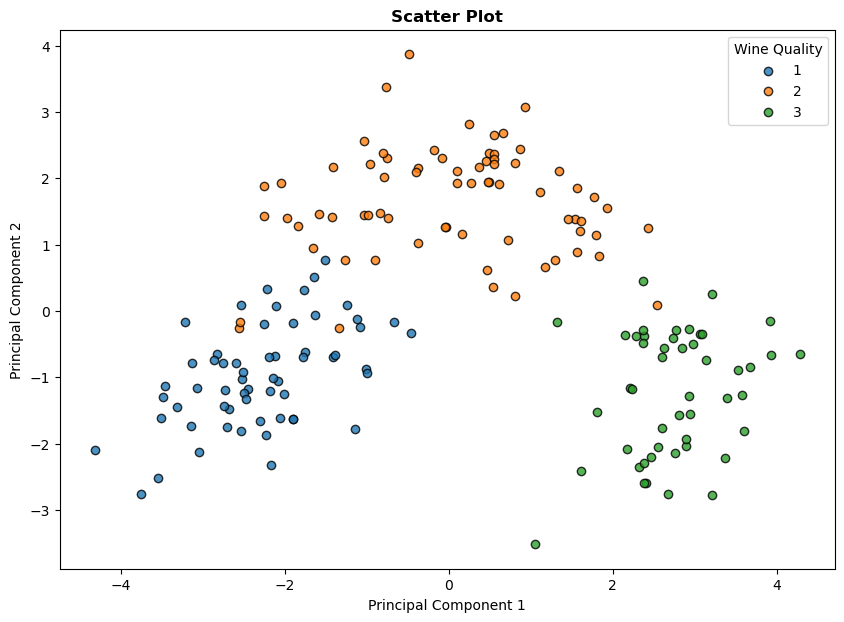

In [8]:
W_2 = eigenvectors[:, :2]   
Z_2 = X_std.dot(W_2)        
plt.figure(figsize=(10, 7))
categories = np.unique(y)   
for i in categories:
    plt.scatter(Z_2[np.array(y).ravel() == i, 0], Z_2[np.array(y).ravel() == i, 1], alpha=0.8, edgecolors='k', label=i)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Scatter Plot', fontweight='bold')
plt.legend(title='Wine Quality')
plt.show()


This scatter plot shows the wine samples projected onto the first two principal components, with each color representing a different wine quality category (0, 1, or 2). The clusters indicate that wines of similar quality tend to group together in this reduced-dimensional space, suggesting that the principal components effectively capture the variance associated with wine quality.

## Reference
<span style="color:firebrick">1.</span> Pearson, K. (1901). *On Lines and Planes of Closest Fit to Systems of Points in Space*. Philosophical Magazine, 2(11), 559–572. [https://doi.org/10.1080/14786440109462720](https://doi.org/10.1080/14786440109462720)

<span style="color:firebrick">2.</span> Cattell, R. B. (1966). *The Scree Test For The Number Of Factors*. Multivariate Behavioral Research, 1(2), 245–276. [https://doi.org/10.1207/s15327906mbr0102_10](https://doi.org/10.1207/s15327906mbr0102_10)

<span style="color:firebrick">3.</span> Strang, G. (2016). *Introduction to Linear Algebra* (5th ed.). Wellesley-Cambridge Press.